In [1]:
import pandas as pd

import spacy
from spacy import displacy

In [2]:
# my_spacy = spacy.load("en")
my_spacy = spacy.load("en_core_web_md") # load up spaCy

In [3]:
# test if my_spacy works first
random_sentence = "The pasta was great, but the waiter was rude!"
random_sen_spacy = my_spacy(random_sentence)

In [4]:
# Positive and Negative Adjectives (courtesy of Liu B.)

# Negative Adjectives
neg_lexicons = open('opinion_lexicons/negative_words.txt')
neg_words = []

for word in neg_lexicons:
    neg_words.append(word.strip())

# Positive Adjectives
pos_lexicons = open('opinion_lexicons/positve_words.txt')
pos_words = []

for word in pos_lexicons:
    pos_words.append(word.strip())

In [5]:
len(pos_words) + len(neg_words)

6790

In [6]:
## read in pickled pandas data
import pickle

reviews_pd = pickle.load(open("pickled_data/pickled_reviews_pd.pkl", "rb"))
reviews_pd.head(3)

,Aspect Count,Aspect Polarity,Aspect Term,Category,Category Count,Category Polarity,Review,Review ID
0,1,[negative],[staff],[service],1,[negative],But the staff was so horrible to us.,3121
1,1,[positive],[food],"[food, anecdotes/miscellaneous]",2,"[positive, negative]","To be completely fair, the only redeeming fact...",2777
2,3,"[positive, positive, neutral]","[food, kitchen, menu]",[food],1,[positive],"The food is uniformly exceptional, with a very...",1634


In [7]:
subset = reviews_pd.iloc[0:15,]
subset

,Aspect Count,Aspect Polarity,Aspect Term,Category,Category Count,Category Polarity,Review,Review ID
0,1,[negative],[staff],[service],1,[negative],But the staff was so horrible to us.,3121
1,1,[positive],[food],"[food, anecdotes/miscellaneous]",2,"[positive, negative]","To be completely fair, the only redeeming fact...",2777
2,3,"[positive, positive, neutral]","[food, kitchen, menu]",[food],1,[positive],"The food is uniformly exceptional, with a very...",1634
3,3,"[positive, positive, neutral]","[food, kitchen, menu]",[service],1,[positive],Where Gabriela personaly greets you and recomm...,2534
4,3,"[positive, positive, neutral]","[food, kitchen, menu]",[anecdotes/miscellaneous],1,[positive],"For those that go once and don't enjoy it, all...",583
5,2,"[positive, positive]","[food, perks]","[food, service]",2,"[positive, positive]","Not only was the food outstanding, but the lit...",2846
6,2,"[positive, positive]","[food, perks]","[food, price]",2,"[negative, negative]",It is very overpriced and not very tasty.,1571
7,4,"[positive, positive, neutral, neutral]","[orrechiete with sausage and chicken, waiters,...","[food, service]",2,"[positive, positive]",Our agreed favorite is the orrechiete with sau...,1458
8,1,[positive],[Bagels],[food],1,[positive],The Bagels have an outstanding taste with a te...,3161
9,1,[positive],[food],[food],1,[positive],Nevertheless the food itself is pretty good.,2391


In [8]:
# 

In [9]:
absa_classifier_unsupervised = []

for row in reviews_pd.itertuples():

    data_dict = {}
    review = row[7]
    #print(review)
    data_dict["Review"] = review
    
    # convert review to spaCy object
    review_spaCy = my_spacy(review)
#     print()
#     for tok in review_spaCy:
#         print(tok.text, tok.pos_, tok.dep_)
    
    asp_terms = []
    asp_pols = []
    
    for token in review_spaCy:
        if (token.pos_ == "NOUN"):
            asp_terms.append(token.text)
        if (token.dep_ == "acomp" or token.dep_ == "amod"):
            if (token.text in pos_words):
                asp_pols.append("positive")
            elif (token.text in neg_words):
                asp_pols.append("negative")
            else:
                asp_pols.append("neutral")
    data_dict["Aspect Term"] = asp_terms
    data_dict["Aspect Polarity"] = asp_pols
    
    absa_classifier_unsupervised.append(data_dict)

In [10]:
classifier_pd = pd.DataFrame(absa_classifier_unsupervised)
classifier_pd.head(15)

,Aspect Polarity,Aspect Term,Review
0,[negative],[staff],But the staff was so horrible to us.
1,"[positive, positive, neutral, neutral]","[factor, food, deficiencies]","To be completely fair, the only redeeming fact..."
2,"[positive, positive]","[food, kitchen, menu]","The food is uniformly exceptional, with a very..."
3,[],[what],Where Gabriela personaly greets you and recomm...
4,[],[],"For those that go once and don't enjoy it, all..."
5,"[positive, neutral, positive]","[food, perks]","Not only was the food outstanding, but the lit..."
6,[negative],[],It is very overpriced and not very tasty.
7,"[neutral, positive]","[favorite, orrechiete, sausage, chicken, waite...",Our agreed favorite is the orrechiete with sau...
8,"[positive, positive]","[Bagels, taste, texture]",The Bagels have an outstanding taste with a te...
9,[positive],[food],Nevertheless the food itself is pretty good.


In [11]:
reviews_pd.head(15)

,Aspect Count,Aspect Polarity,Aspect Term,Category,Category Count,Category Polarity,Review,Review ID
0,1,[negative],[staff],[service],1,[negative],But the staff was so horrible to us.,3121
1,1,[positive],[food],"[food, anecdotes/miscellaneous]",2,"[positive, negative]","To be completely fair, the only redeeming fact...",2777
2,3,"[positive, positive, neutral]","[food, kitchen, menu]",[food],1,[positive],"The food is uniformly exceptional, with a very...",1634
3,3,"[positive, positive, neutral]","[food, kitchen, menu]",[service],1,[positive],Where Gabriela personaly greets you and recomm...,2534
4,3,"[positive, positive, neutral]","[food, kitchen, menu]",[anecdotes/miscellaneous],1,[positive],"For those that go once and don't enjoy it, all...",583
5,2,"[positive, positive]","[food, perks]","[food, service]",2,"[positive, positive]","Not only was the food outstanding, but the lit...",2846
6,2,"[positive, positive]","[food, perks]","[food, price]",2,"[negative, negative]",It is very overpriced and not very tasty.,1571
7,4,"[positive, positive, neutral, neutral]","[orrechiete with sausage and chicken, waiters,...","[food, service]",2,"[positive, positive]",Our agreed favorite is the orrechiete with sau...,1458
8,1,[positive],[Bagels],[food],1,[positive],The Bagels have an outstanding taste with a te...,3161
9,1,[positive],[food],[food],1,[positive],Nevertheless the food itself is pretty good.,2391


In [17]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Let's look at the distribution of the Aspect Categories first
asp_terms_freq = []

for term in classifier_pd['Aspect Term']:
    asp_terms_freq += term

asp_terms_freq = Counter(asp_terms_freq)
asp_terms_freq.most_common()[0:15]

len(asp_terms_freq.keys())

1971

In [19]:
term_freq_top15_x = [tup[0] for tup in asp_terms_freq.most_common()[0:15]]
term_freq_top15_y = [tup[1] for tup in asp_terms_freq.most_common()[0:15]]

In [20]:
index = np.arange(len(term_freq_top15_x)) # for the xticks
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

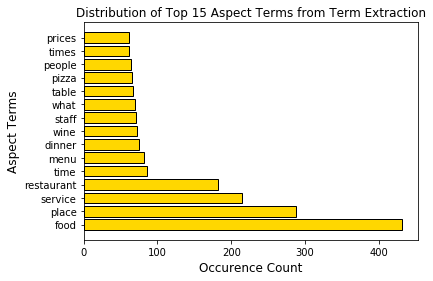

In [23]:
plt.barh(index, term_freq_top15_y,
         color='gold',  edgecolor='black')
plt.yticks(index, term_freq_top15_x, fontsize = 10)
plt.title("Distribution of Top 15 Aspect Terms from Term Extraction")
plt.ylabel("Aspect Terms", fontsize = 12)
plt.xlabel("Occurence Count", fontsize = 12)
plt.show()

In [24]:
asp_terms_freq = []

for term in classifier_pd['Aspect Term']:
    asp_terms_freq += term

asp_terms_freq = Counter(asp_terms_freq)
asp_terms_freq.most_common()[0:15]

len(asp_terms_freq.keys())

1971

In [25]:
pol_terms_freq = []

for pol in classifier_pd['Aspect Polarity']:
    pol_terms_freq += pol
    
pol_terms_freq = Counter(pol_terms_freq)

In [27]:
pol_terms_freq['positive']

1647

In [28]:
pol_terms_freq['negative']

442

In [29]:
pol_terms_freq['neutral']

1846

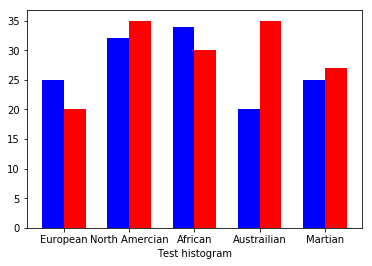

In [31]:
womenMeans = (25, 32, 34, 20, 25)
menMeans = (20, 35, 30, 35, 27)
indices = range(len(womenMeans))
names = ['Asian','European','North Amercian','African','Austrailian','Martian']
# Calculate optimal width
width = np.min(np.diff(indices))/3.

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width/2.,womenMeans,width,color='b',label='-Ymin')
ax.bar(indices+width/2.,menMeans,width,color='r',label='Ymax')
#tiks = ax.get_xticks().tolist()
ax.axes.set_xticklabels(names)
ax.set_xlabel('Test histogram')
plt.show()

In [90]:
# food, ambience, price, service, anecdotes/misc.
positive = (700, 200, 600, 350, 450)
negative = (100, 620, 320, 500, 200)
neutral = (200, 500, 80, 150, 350)

In [91]:
indices = range(len(positive))
labels = ['x', 'Food', 'Ambience', 'Price', 'Service', 'Misc.']

In [92]:
width = np.min(np.diff(indices))/4.

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width/2., positive,width,color='steelblue', edgecolor='black')
# ax.bar(indices+width/2., neutral,width,color='red', label='Yblah', edgecolor='black')
ax.bar(indices+width/2., negative,width,color='gold', edgecolor='black')

ax.axes.set_xticklabels(labels)
ax.set_xlabel('Restaurant Features')
ax.set_ylabel('Count')
ax.legend(['positive', 'negative'])
ax.set_title('Customer Sentiment towards a Restaurant\'s Features')

Text(0.5,1,"Customer Sentiment towards a Restaurant's Features")

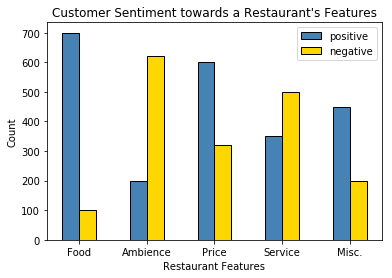

In [138]:
plt.show()
plt.savefig('term-dist.png')